<a href="https://colab.research.google.com/github/ChristianConchari/Computer-Vision-Notes/blob/master/Tutorial_6_Canny_Edge_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Tutorial 6: Canny Edge Detection

The Canny edge detector is an edge detection operator that uses a multi-stage algorithm to detect a wide range of edges in images. It was developed by John F. Canny in 1986 and it is widely used by computer vision professionals because of its efficiency removing noise, detecting and standardising edges. On the other hand, there are many methods that came up in later years but just a few are that known as the Canny Edge Detector. 

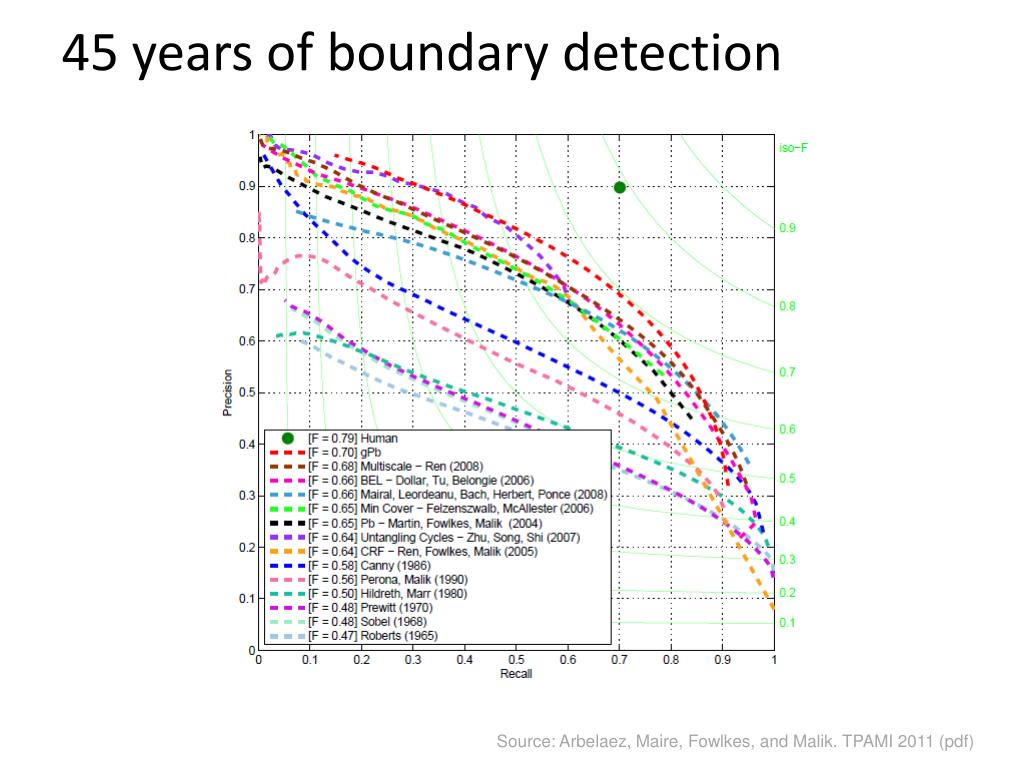

The Process of Canny edge detection algorithm can be broken down to 4 different steps:

1. Apply Gaussian filter to smooth the image in order to remove the noise
2. Apply sobel filters
3. Apply non-maximum suppression to get rid of spurious response to edge detection.
Apply double threshold to determine potential edges.
4. Track edge by hysteresis: Finalize the detection of edges by suppressing all the other edges that are weak and not connected to strong edges.

## Import the libraries

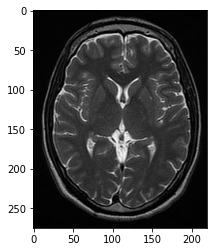

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

%matplotlib inline

# Read in the image
image = cv2.imread('brain_MR.jpg')

# Change color to RGB (from BGR)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.imshow(image)

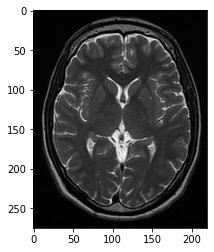

In [ ]:
# Convert the image to grayscale for processing
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)

plt.imshow(gray, cmap='gray')

## Implement Canny edge detection

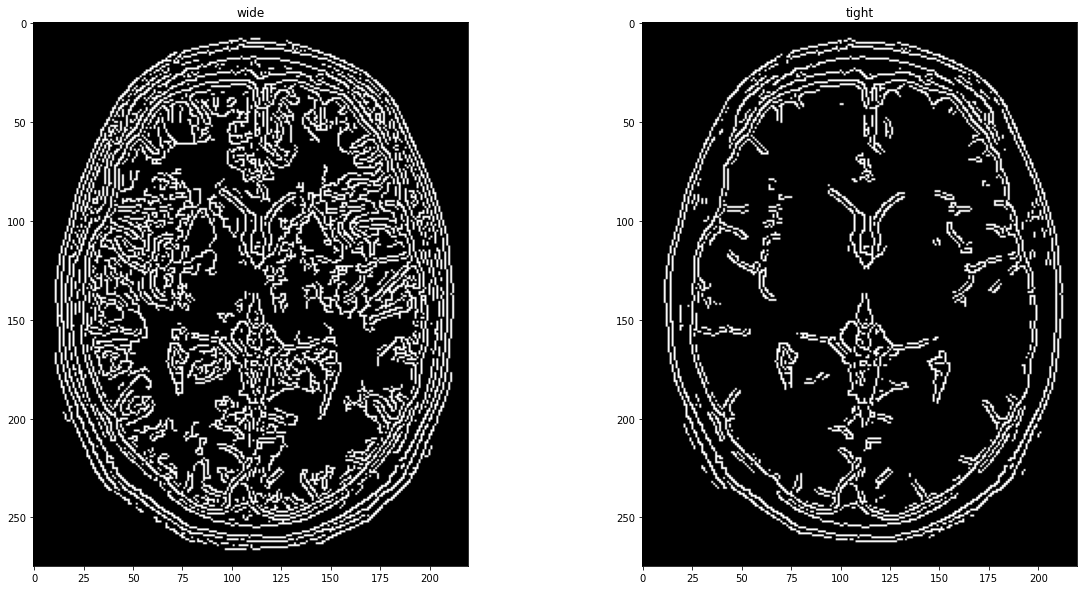

In [ ]:
# Try Canny using "wide" and "tight" thresholds

wide = cv2.Canny(gray, 30, 100)
tight = cv2.Canny(gray, 200, 240)
    
# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight, cmap='gray')

### Exercise 1: Apply low-pass filtering first 
Now, use a noised image and make sure that the image is low-pass filtered before passing it on to the Canny function. You can always use another low-pass filter beforehand if it's required for your input image. Important, evaluate and describe the results when you implement uniquely canny vs when you implement an additional low-passfilter + canny. 

SOLUTION EXERCISE 1.
-----

(400, 600)


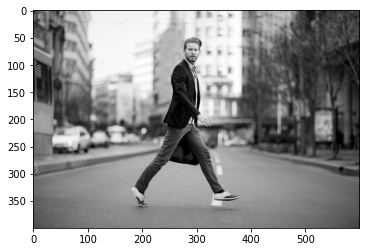

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = mpimg.imread('cross.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

# Convert to grayscale for filtering
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print(gray.shape)
plt.imshow(gray, cmap="gray")

We will add Salt&Pepper noise to the image.

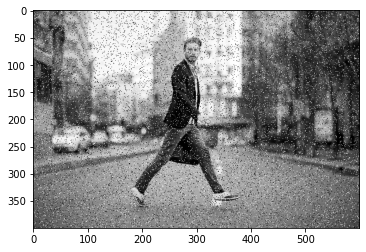

In [ ]:
from skimage.util import random_noise

#Add noise to the image
noise_img = random_noise(gray, mode='s&p',amount=0.1)

plt.imshow(noise_img, cmap="gray")

A median filter will be applied to remove Gaussian noise, that way everything will be ready for the edge detection stage.

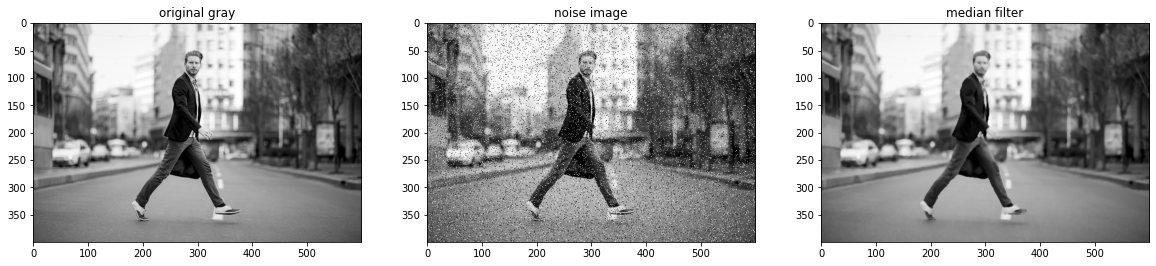

In [ ]:
# applies median filter
# parameters: image, size of the kernel
median = cv2.medianBlur(np.float32(noise_img),5)
median = (median*255).astype(np.uint8)

# show and compare the resutls
f, (ax1, ax2, ax3) = plt.subplots(1 , 3, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('noise image')
ax2.imshow(noise_img, cmap='gray')

ax3.set_title('median filter')
ax3.imshow(median, cmap='gray')

From this point we will separate into two paths. In the first, we will directly apply the edge detection algorithm and in the second, we will apply low-pass filtering, with a Gaussian filter.

-------------------

Next, we will apply Canny Edge Detection to Image Without low pass filtering

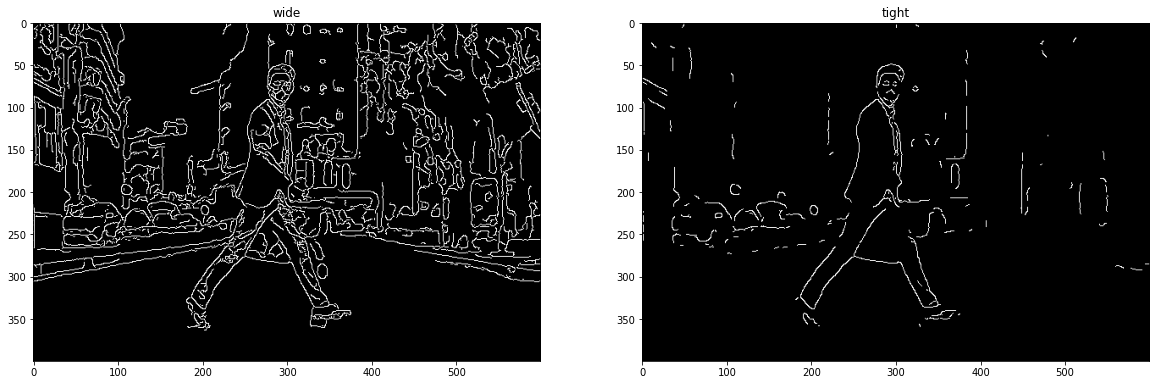

In [ ]:
# Apply Canny Edge Detection to Image Without Gaussian or other low-pass filter

wide1 = cv2.Canny(median, 30, 100)
tight1 = cv2.Canny(median, 200, 240)

# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide1, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight1, cmap='gray')

As we can see in the images above, on the right we can see all the outlines of the image, and on the left, we can see mainly the outline of the person walking.

---

Next, we will apply Canny Edge Detection to Image w[texto del vínculo](https://)ith low pass filtering

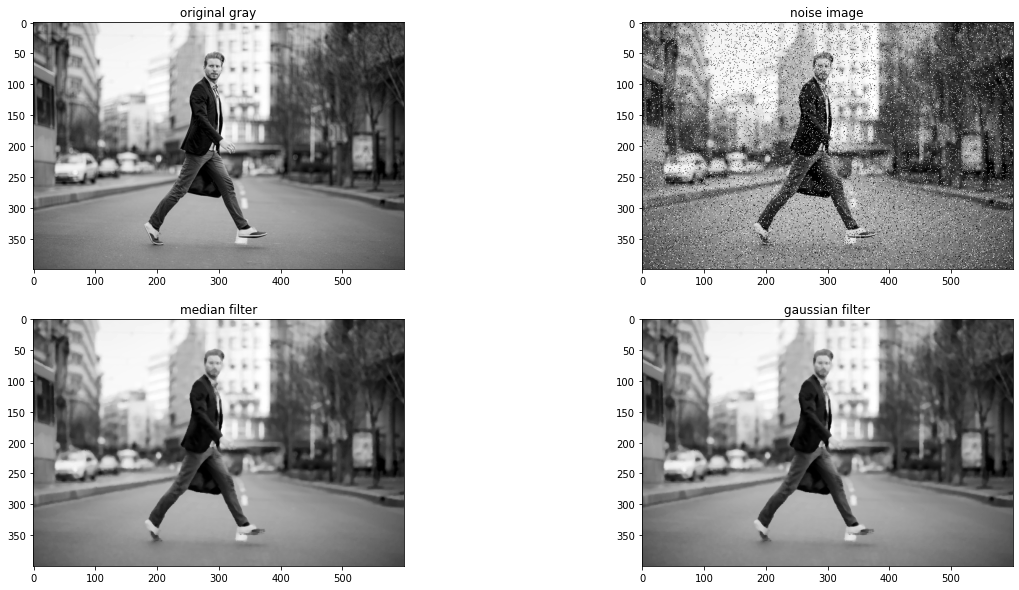

In [ ]:
# applies gaussian blur with standar deviation  = 0 
kernel_size = 15
# parameters: image, kernel dimensions, sigma x, sigma y
gaussian = cv2.GaussianBlur(median,(kernel_size,kernel_size),0.3,0.5)

# shows the results
f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2 , 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(gray, cmap='gray')

ax2.set_title('noise image')
ax2.imshow(noise_img, cmap='gray')

ax3.set_title('median filter')
ax3.imshow(median, cmap='gray')

ax4.set_title('gaussian filter')
ax4.imshow(gaussian, cmap='gray')

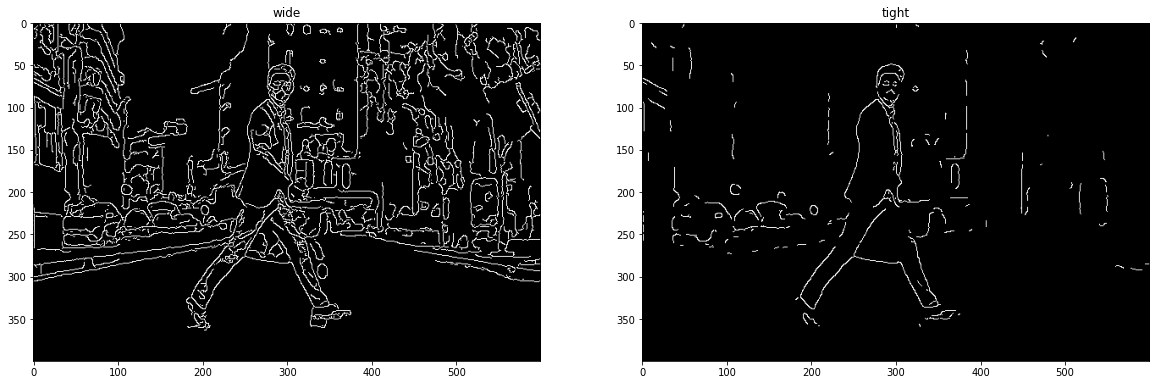

In [ ]:
# Apply Canny Edge Detection to Image With Gaussian Filter

wide2 = cv2.Canny(gaussian, 30, 100)
# Edges too much connected 
tight2 = cv2.Canny(gaussian, 200, 240)

# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide2, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight2, cmap='gray')

Same as it was shown before, on the right we can see all the outlines of the image, and on the left, we can see mainly the outline of the person walking. Not many differences are noticeable between with and without the Gaussian filter. 

To show a little more the importance of the low pass filter, the Canny algorithm will be applied directly to the image with noise.

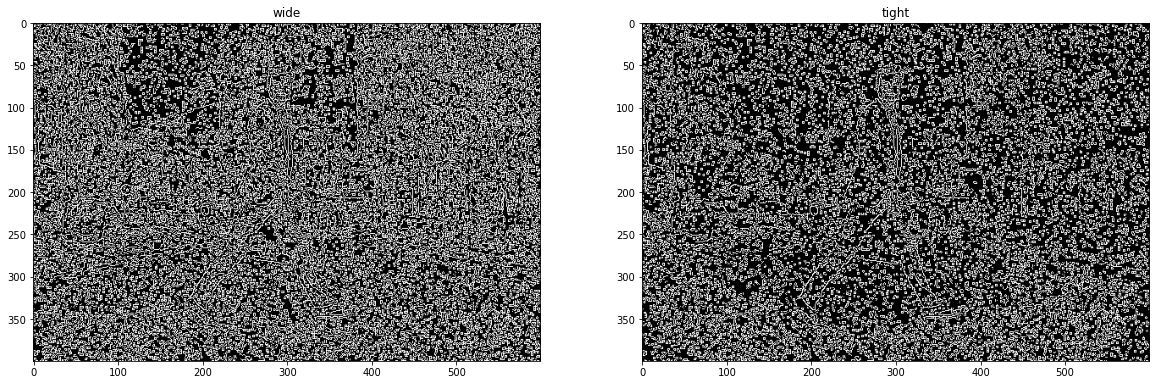

In [ ]:
# Apply Canny Edge Detection to Image With noise

wide3 = cv2.Canny((noise_img*255).astype(np.uint8), 30, 100)
# Edges too much connected 
tight3 = cv2.Canny((noise_img*255).astype(np.uint8), 200, 240)

# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide3, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight3, cmap='gray')

As you can see in this last image, the low pass filter prior to the Canny algorithm is very important, otherwise, as you can see, the same noise will be detected as edges. 

---

### Exercise 2: Try to find the edges of a picture

Do you remember the Exercise 2 of the previous tutorial? Implement canny edge detection and compare the previous results of the CT scan of the patient. Finally, Define lower and upper thresholds for hysteresis and display the difference. How is the performance of canny edge detection? 

SOLUTION EXERCISE 2.
----


(369, 632)


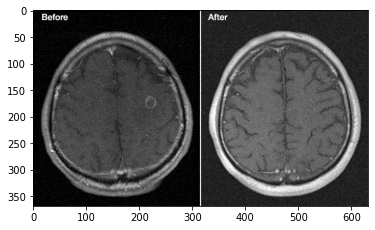

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

import cv2
import numpy as np

%matplotlib inline

# Read in the image
image = cv2.imread('CT benign tumor.png')

# Convert to grayscale for filtering
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
gray = cv2.cvtColor(image, cv2.COLOR_RGB2GRAY)
print(gray.shape)
plt.imshow(gray, cmap="gray")

We will separate the image in two, to be able to work independently on the before and after images.

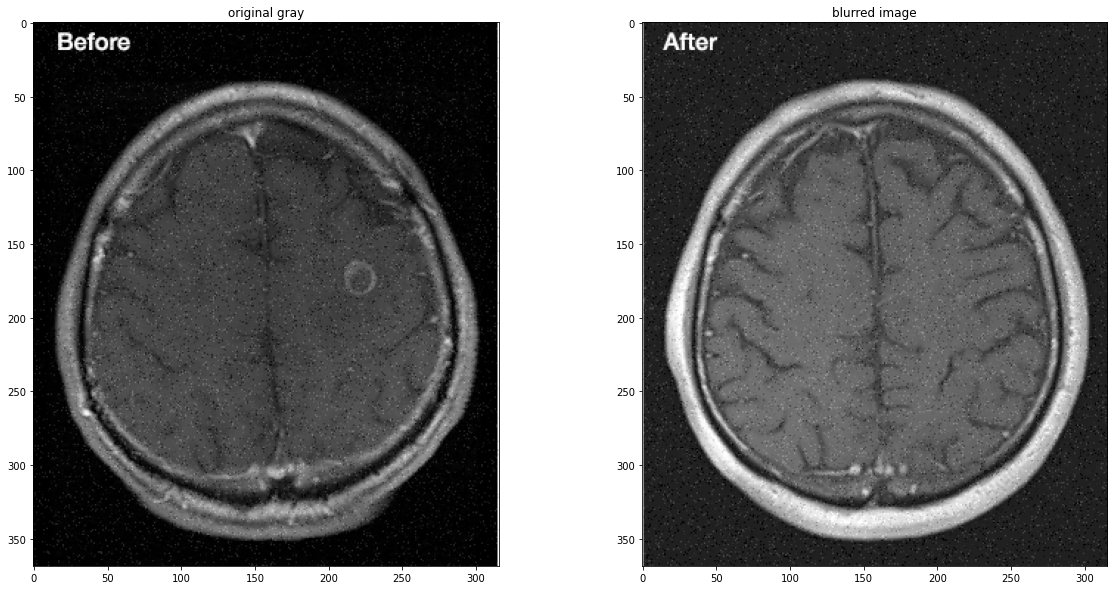

In [ ]:
before = gray[0:369,0:316]
after = gray[0:369,316:632]

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(before, cmap='gray')

ax2.set_title('blurred image')
ax2.imshow(after, cmap='gray')

----

In this part we will try to detect or highlight the edges without using the Canny algorithm.


For doing this we will apply the following processing to both images:
*   Low-pass Filter to remove noise from the original image (Median filter).
*   High-pass filter to maintain edges (Sobel vertical).
*   We will make the binary image using Thresholding.

This was done in order to show only the edges in the image.




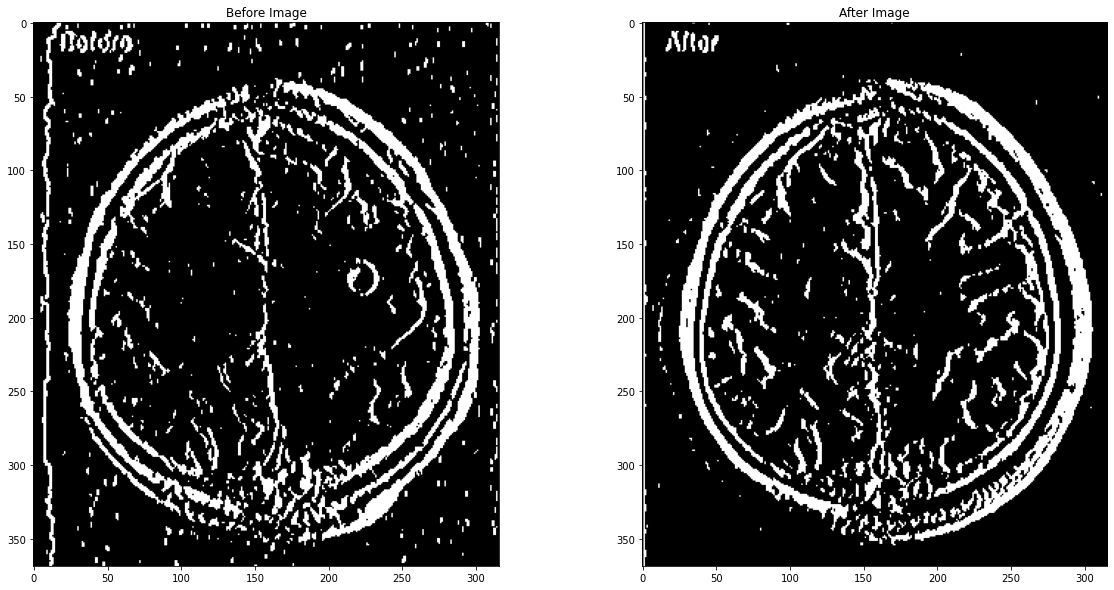

In [ ]:
# Apply median filter (low-pass filter)
before_median = cv2.medianBlur(np.float32(before),3)
before_median = (before_median*255).astype(np.uint8)
after_median = cv2.medianBlur(np.float32(after),3)
after_median = (after_median*255).astype(np.uint8)

# Apply sobel vertical filter (high-pass filter)
high_pass_filter = np.array([[-10, 0, 10], 
                            [ -20, 0, 20], 
                            [ -10, 0, 10]])

# Apply thresholding
before_high_pass = cv2.filter2D(before_median, -1, high_pass_filter)
after_high_pass = cv2.filter2D(after_median, -1, high_pass_filter)

_, before_high_pass = cv2.threshold(before_high_pass, 150, 255, cv2.THRESH_BINARY)
_, after_high_pass = cv2.threshold(after_high_pass, 150, 255, cv2.THRESH_BINARY)

f, (ax1, ax2) = plt.subplots(1 , 2, figsize=(20,10))
ax1.set_title('Before Image')
ax1.imshow(before_high_pass, cmap='gray')

ax2.set_title('After Image')
ax2.imshow(after_high_pass, cmap='gray')

As we can see in the resulting images, the edges can be seen more clearly, where we can distinguish the tumour. It should be noted that some noise still persists, some edges appear to be very thick and all edges may not be taken into account. 

-----

Now we will try to detect the edges using the Canny algorithm. The steps necessary to achieve this will be the following:



*   Apply Low-pass filter (Gaussian)
*   Apply Canny algorithm

We will start by applying low pass filtering.

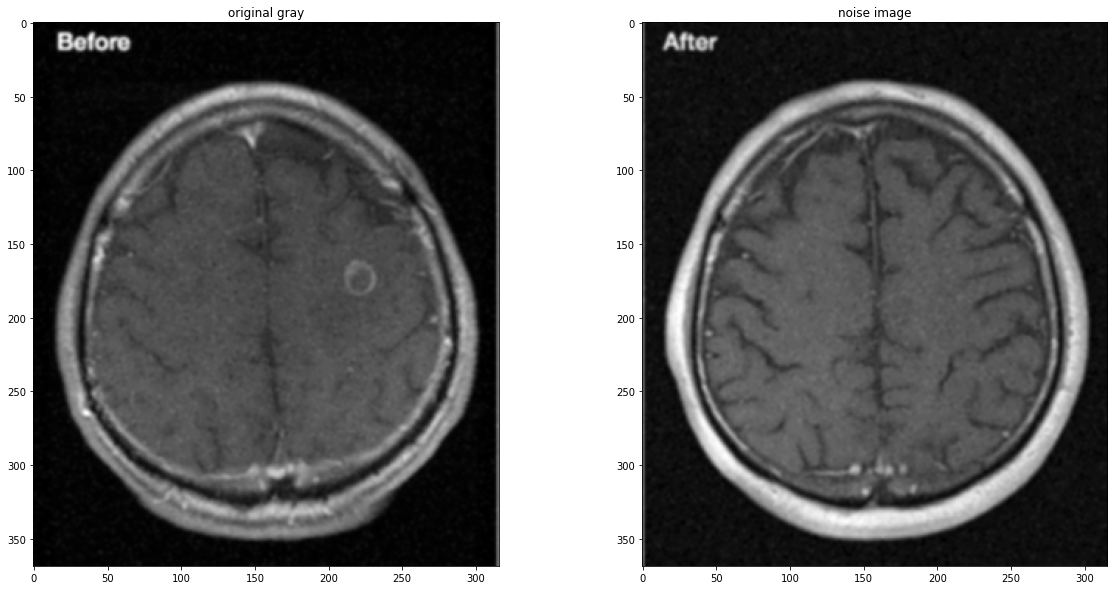

In [ ]:
# applies gaussian blur with standar deviation  = 0 
kernel_size = 5
# parameters: image, kernel dimensions, sigma x, sigma y
gaussian_before = cv2.GaussianBlur(before,(kernel_size,kernel_size),0,0)
gaussian_after = cv2.GaussianBlur(after,(kernel_size,kernel_size),0,0)

# show and compare the resutls
f, (ax1, ax2) = plt.subplots(1 , 2, figsize=(20,10))

ax1.set_title('original gray')
ax1.imshow(gaussian_before, cmap='gray')

ax2.set_title('noise image')
ax2.imshow(gaussian_after, cmap='gray')

Now we will apply the Canny algorithm to detect the edges in both images.

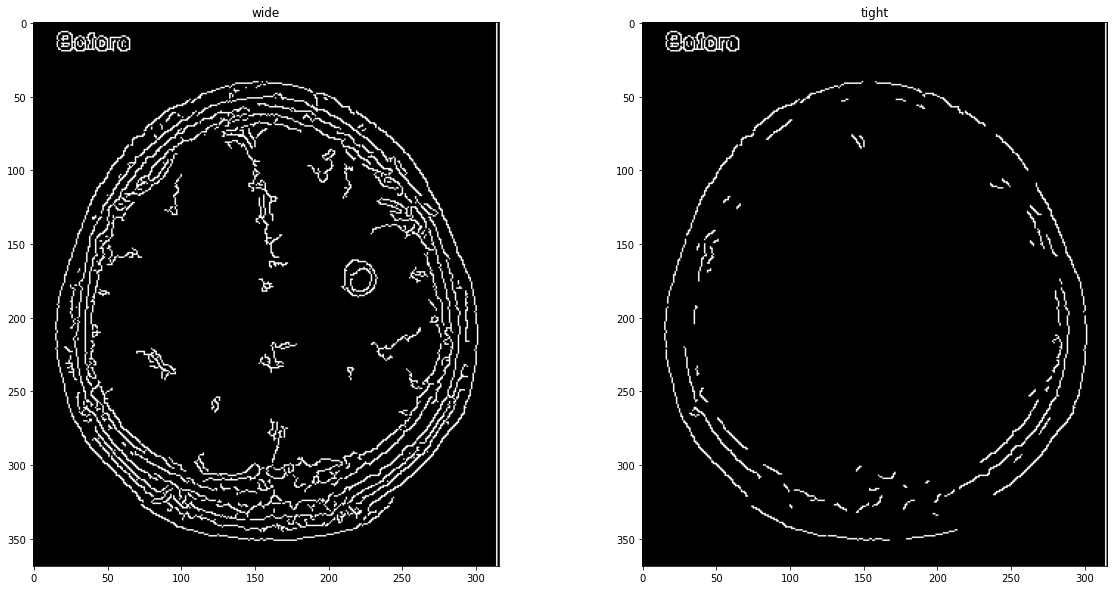

In [ ]:
# Apply Canny Edge Detection to Image With Gaussian Filter

wide_before = cv2.Canny(gaussian_before, 30, 100)
# Edges too much connected 
tight_before = cv2.Canny(gaussian_before, 200, 240)

# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide_before, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight_before, cmap='gray')

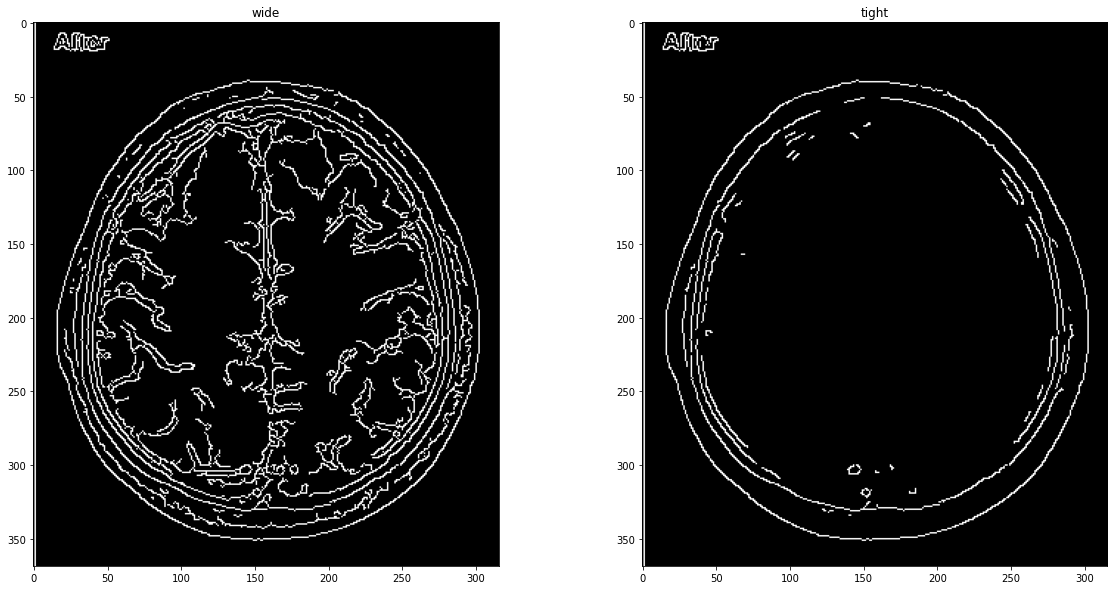

In [ ]:
# Apply Canny Edge Detection to Image With Gaussian Filter

wide_after = cv2.Canny(gaussian_after, 30, 100)
# Edges too much connected 
tight_after = cv2.Canny(gaussian_after, 200, 240)

# Display the images
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))

ax1.set_title('wide')
ax1.imshow(wide_after, cmap='gray')

ax2.set_title('tight')
ax2.imshow(tight_after, cmap='gray')

From this last part we can see that the best results were obtained for wide, therefore, only these will be shown. An image summar will be shown next.

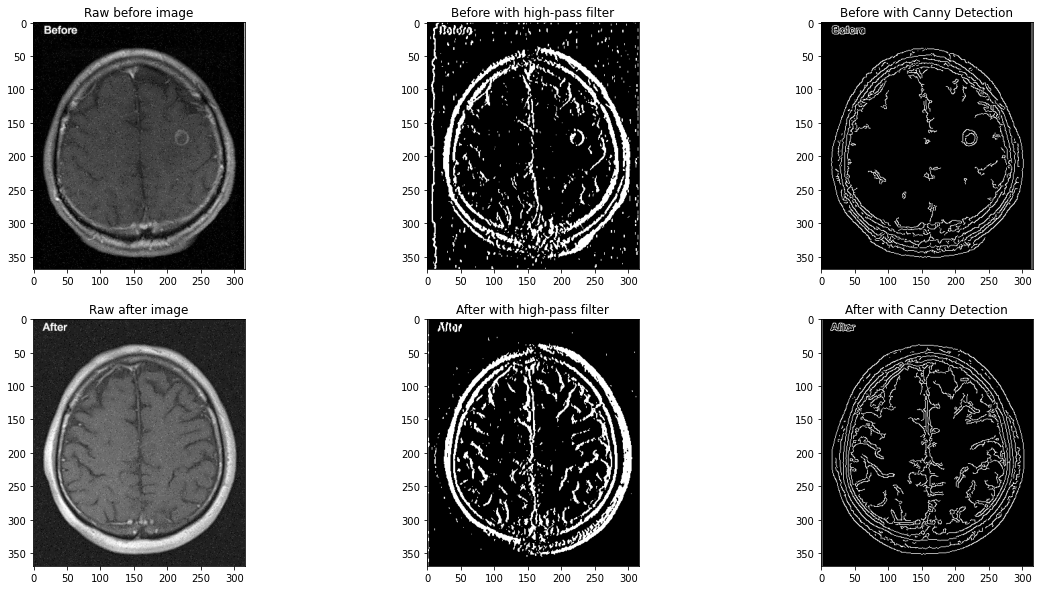

In [ ]:
# Display the images
f, ((ax1, ax2,ax3), (ax4,ax5, ax6)) = plt.subplots(2, 3, figsize=(20,10))

ax1.set_title('Raw before image')
ax1.imshow(before, cmap='gray')

ax4.set_title('Raw after image')
ax4.imshow(after, cmap='gray')

ax2.set_title('Before with high-pass filter')
ax2.imshow(before_high_pass, cmap='gray')

ax5.set_title('After with high-pass filter')
ax5.imshow(after_high_pass, cmap='gray')

ax3.set_title('Before with Canny Detection')
ax3.imshow(wide_before, cmap='gray')

ax6.set_title('After with Canny Detection')
ax6.imshow(wide_after, cmap='gray')


From the results that can be seen in the upper part, we can notice that at first glance it seems that quite similar results were obtained, but if we analyze a little more we can see that the difference between the two paths taken is in the quality of the detected edges This is something that should be taken into account for later stages where you want to detect shapes or classify images. 

We can mention that if possible the results seem quite similar it is because if we remember the theory seen in the matter, the steps that make up the Canny algorithm are in a few words: noise reduction, suppression of false maximums and application of the hysteresis threshold, which we can see as threshold. The reason why the result obtained with the application of the Canny algorithm directly is better, it would be in my opinion that it is due to the fact that it is a function that will do all the steps in the best possible way.